In [ ]:

### available GPU
!nvidia-smi

Thu Aug 31 18:53:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:
# ### installing required libraries
# !pip install super-gradients==3.1.0
# !pip install imutils
# !pip install roboflow
# !pip install pytube --upgrade

In [ ]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
## connecting to the google drive
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### specifying data path

train_path_img = '/content/drive/My Drive/created_dataset_3/train/images'
train_path_label = '/content/drive/My Drive/created_dataset_3/train/labels'
val_path_img = '/content/drive/My Drive/created_dataset_3/val/images'
val_path_label = '/content/drive/My Drive/created_dataset_3/val/labels'
# test_path = "./yolo_data/test/images/"
# test_path_label = "./yolo_data/test/labels/"

In [ ]:
# '''
# Split the dataset into train and test and creates the train.txt and test.tx with
# the respective path of the images in each folder
# '''
# import os

# def train_test_split(path,neg_path=None, split = 0.2):
#     print("------ PROCESS STARTED -------")


#     files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


#     print (f"--- This folder has a total number of {len(files)} images---")
#     random.seed(42)
#     random.shuffle(files)

#     test_size = int(len(files) * split)
#     train_size = len(files) - test_size

#     ## creating required directories

#     os.makedirs(train_path_img, exist_ok = True)
#     os.makedirs(train_path_label, exist_ok = True)
#     os.makedirs(val_path_img, exist_ok = True)
#     os.makedirs(val_path_label, exist_ok = True)


#     ### ----------- copying images to train folder
#     for filex in tqdm(files[:train_size]):
#       if filex == 'classes':
#           continue
#       shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
#       shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



#     print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

#     if neg_path:
#         neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
#         for filex in tqdm(neg_images):
#             shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

#         print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

#         print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



#     ### copytin images to validation folder
#     for filex in tqdm(files[train_size:]):
#       if filex == 'classes':
#           continue
#       # print("running")
#       shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
#       shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

#     print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

#     print("------ TASK COMPLETED -------")

# ## spliting the data into train-test and creating train.txt and test.txt files
# # train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

# ### for label_tag
# train_test_split("/content/drive/My Drive/created_dataset_3/data") ### without negative images
# # train_test_split('./data/','./negative_images/') ### if you want to feed negative images


In [ ]:
# !pip install super-gradients

In [ ]:
from super_gradients.training import dataloaders

[2023-08-21 06:31:29] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-08-21 06:31:32] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-21 06:31:38] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-08-21 06:31:40] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-21 06:31:40] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-21 06:31:40] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val


In [ ]:
dataset_params = {
    'data_dir':'/content/drive/My Drive/created_dataset_3/data/',
    'train_images_dir':'/content/drive/My Drive/created_dataset_3/train/images',
    'train_labels_dir':'/content/drive/My Drive/created_dataset_3/train/labels',
    'val_images_dir':'/content/drive/My Drive/created_dataset_3/val/images',
    'val_labels_dir':'/content/drive/My Drive/created_dataset_3/val/labels',
    # 'test_images_dir':'/content/drive/MyDrive/yolo_nas/test/images',
    # 'test_labels_dir':'/content/drive/MyDrive/yolo_nas/test/labels',
    'classes': ['banana','carrot','apple']
}

In [ ]:
# !pip install super-gradients

In [ ]:

import torch

MODEL_ARCH = 'yolo_nas_l'
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
MAX_EPOCHS = 5
CHECKPOINT_DIR = f'/content/drive/My Drive/created_dataset_3/training_backup'
EXPERIMENT_NAME = f'yolo_nas_l_e5'

In [ ]:
### setting up dataloaders
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

# test_data = coco_detection_yolo_format_val(
#     dataset_params={
#         'data_dir': dataset_params['data_dir'],
#         'images_dir': dataset_params['test_images_dir'],
#         'labels_dir': dataset_params['test_labels_dir'],
#         'classes': dataset_params['classes']
#     },
#     dataloader_params={
#         'batch_size': BATCH_SIZE,
#         'num_workers': 2
#     }
# )


[2023-08-21 06:31:46] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 679/679 [06:25<00:00,  1.76it/s]
[2023-08-21 06:38:15] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:  99%|█████████▉| 137/138 [01:38<00:00,  1.24it/s]

In [ ]:
### applying custom transformations
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

Indexing dataset annotations: 100%|██████████| 138/138 [01:39<00:00,  1.39it/s]


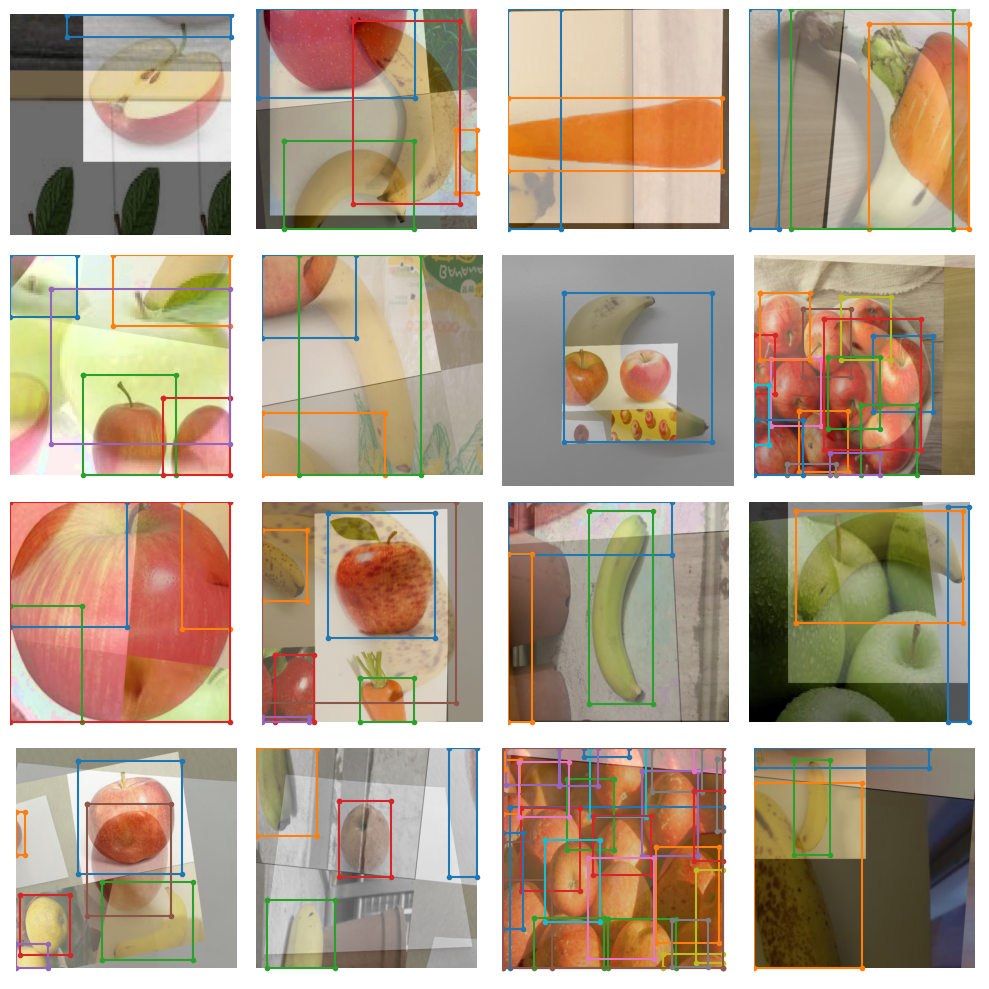

In [ ]:
### visualizing data after transformation
train_data.dataset.plot()

In [ ]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)


[2023-08-21 06:40:00] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:04<00:00, 65.3MB/s]
[2023-08-21 06:40:04] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:

from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

In [ ]:

%load_ext tensorboard
%tensorboard --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME}


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-08-21 06:40:07.011097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]

In [ ]:

trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

The console stream is now moved to /content/drive/My Drive/created_dataset_3/training_backup/yolo_nas_l_e5/console_Aug21_06_40_17.txt


[2023-08-21 06:40:17] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-08-21 06:40:19] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 632        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         79         (len(train_loader))
    - Gradient updates per epoch:   79         (len(train_loader) / batch_accumulate)

[2023-08-21 06:40:19] INFO - sg_trainer.py - Started training for 5 epochs (0/4)

Validating: 100%|██████████| 16/16 [00:06<00:00,  2.59it/s]
[2023-08-21 06:41:45] INFO - base_sg_logger.py - 

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.377
│   ├── Ppyoloeloss/loss_iou = 0.218
│   ├── Ppyoloeloss/loss_dfl = 1.4862
│   └── Ppyoloeloss/loss = 3.6651
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.8164
    ├── Ppyoloeloss/loss_iou = 0.1176
    ├── Ppyoloeloss/loss_dfl = 1.1249
    ├── Ppyoloeloss/loss = 3.6728
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.068
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 16/16 [00:06<00:00,  2.59it/s]
[2023-08-21 06:43:37] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/My Drive/created_dataset_3/training_backup/yolo_nas_l_e5/ckpt_best.pth
[2023-08-21 06:43:37] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5210058093070984


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2903
│   │   ├── Epoch N-1      = 2.377  (↘ -1.0867)
│   │   └── Best until now = 2.377  (↘ -1.0867)
│   ├── Ppyoloeloss/loss_iou = 0.1875
│   │   ├── Epoch N-1      = 0.218  (↘ -0.0305)
│   │   └── Best until now = 0.218  (↘ -0.0305)
│   ├── Ppyoloeloss/loss_dfl = 1.3316
│   │   ├── Epoch N-1      = 1.4862 (↘ -0.1546)
│   │   └── Best until now = 1.4862 (↘ -0.1546)
│   └── Ppyoloeloss/loss = 2.4248
│       ├── Epoch N-1      = 3.6651 (↘ -1.2404)
│       └── Best until now = 3.6651 (↘ -1.2404)
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.0639
    │   ├── Epoch N-1      = 2.8164 (↘ -0.7525)
    │   └── Best until now = 2.8164 (↘ -0.7525)
    ├── Ppyoloeloss/loss_iou = 0.1297
    │   ├── Epoch N-1      = 0.1176 (↗ 0.0121)
    │   └── Best until now = 0.1176 (↗ 0.0121)
    ├── Ppyoloeloss/loss_dfl = 1.1189
    │   ├── Epoch N-1      = 1.1249 (↘ -0.006)
    │   └── Best until now = 1.1249 (↘ -0.006)
    ├── Ppyoloeloss/loss =

Validating epoch 2: 100%|██████████| 16/16 [00:06<00:00,  2.34it/s]
[2023-08-21 06:45:21] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/My Drive/created_dataset_3/training_backup/yolo_nas_l_e5/ckpt_best.pth
[2023-08-21 06:45:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6294413805007935


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1976
│   │   ├── Epoch N-1      = 1.2903 (↘ -0.0928)
│   │   └── Best until now = 1.2903 (↘ -0.0928)
│   ├── Ppyoloeloss/loss_iou = 0.2002
│   │   ├── Epoch N-1      = 0.1875 (↗ 0.0127)
│   │   └── Best until now = 0.1875 (↗ 0.0127)
│   ├── Ppyoloeloss/loss_dfl = 1.3701
│   │   ├── Epoch N-1      = 1.3316 (↗ 0.0386)
│   │   └── Best until now = 1.3316 (↗ 0.0386)
│   └── Ppyoloeloss/loss = 2.3831
│       ├── Epoch N-1      = 2.4248 (↘ -0.0417)
│       └── Best until now = 2.4248 (↘ -0.0417)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0552
    │   ├── Epoch N-1      = 2.0639 (↘ -1.0088)
    │   └── Best until now = 2.0639 (↘ -1.0088)
    ├── Ppyoloeloss/loss_iou = 0.1515
    │   ├── Epoch N-1      = 0.1297 (↗ 0.0218)
    │   └── Best until now = 0.1176 (↗ 0.0339)
    ├── Ppyoloeloss/loss_dfl = 1.3083
    │   ├── Epoch N-1      = 1.1189 (↗ 0.1894)
    │   └── Best until now = 1.1189 (↗ 0.1894)
    ├── Ppyoloeloss/loss = 2.0

Validating epoch 3: 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2001
│   │   ├── Epoch N-1      = 1.1976 (↗ 0.0025)
│   │   └── Best until now = 1.1976 (↗ 0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.2048
│   │   ├── Epoch N-1      = 0.2002 (↗ 0.0046)
│   │   └── Best until now = 0.1875 (↗ 0.0173)
│   ├── Ppyoloeloss/loss_dfl = 1.4142
│   │   ├── Epoch N-1      = 1.3701 (↗ 0.044)
│   │   └── Best until now = 1.3316 (↗ 0.0826)
│   └── Ppyoloeloss/loss = 2.4191
│       ├── Epoch N-1      = 2.3831 (↗ 0.036)
│       └── Best until now = 2.3831 (↗ 0.036)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4411
    │   ├── Epoch N-1      = 1.0552 (↗ 0.3859)
    │   └── Best until now = 1.0552 (↗ 0.3859)
    ├── Ppyoloeloss/loss_iou = 0.158
    │   ├── Epoch N-1      = 0.1515 (↗ 0.0065)
    │   └── Best until now = 0.1176 (↗ 0.0404)
    ├── Ppyoloeloss/loss_dfl = 1.2995
    │   ├── Epoch N-1      = 1.3083 (↘ -0.0088)
    │   └── Best until now = 1.1189 (↗ 0.1806)
    ├── Ppyoloeloss/loss = 2.4859
    │

Validating epoch 4: 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]
[2023-08-21 06:48:45] INFO - base_sg_logger.py - Checkpoint saved in /content/drive/My Drive/created_dataset_3/training_backup/yolo_nas_l_e5/ckpt_best.pth
[2023-08-21 06:48:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8800403475761414


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.083
│   │   ├── Epoch N-1      = 1.2001 (↘ -0.1171)
│   │   └── Best until now = 1.1976 (↘ -0.1146)
│   ├── Ppyoloeloss/loss_iou = 0.1766
│   │   ├── Epoch N-1      = 0.2048 (↘ -0.0282)
│   │   └── Best until now = 0.1875 (↘ -0.0109)
│   ├── Ppyoloeloss/loss_dfl = 1.2813
│   │   ├── Epoch N-1      = 1.4142 (↘ -0.1328)
│   │   └── Best until now = 1.3316 (↘ -0.0503)
│   └── Ppyoloeloss/loss = 2.165
│       ├── Epoch N-1      = 2.4191 (↘ -0.2541)
│       └── Best until now = 2.3831 (↘ -0.218)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9021
    │   ├── Epoch N-1      = 1.4411 (↘ -0.539)
    │   └── Best until now = 1.0552 (↘ -0.1531)
    ├── Ppyoloeloss/loss_iou = 0.1288
    │   ├── Epoch N-1      = 0.158  (↘ -0.0293)
    │   └── Best until now = 0.1176 (↗ 0.0112)
    ├── Ppyoloeloss/loss_dfl = 1.1212
    │   ├── Epoch N-1      = 1.2995 (↘ -0.1783)
    │   └── Best until now = 1.1189 (↗ 0.0023)
    ├── Ppyoloeloss/loss = 1

[2023-08-21 06:49:14] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 5: 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]


In [ ]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

[2023-08-21 06:51:04] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/drive/My Drive/created_dataset_3/training_backup/yolo_nas_l_e5/average_model.pth EMA checkpoint.


[2023-08-21 06:56:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


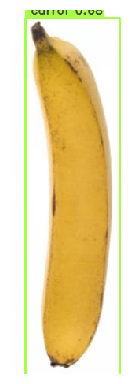

[2023-08-21 06:56:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


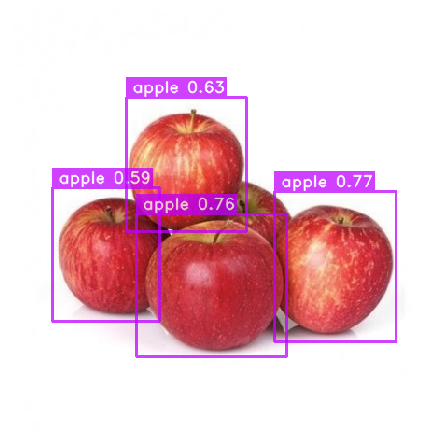

[2023-08-21 06:56:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


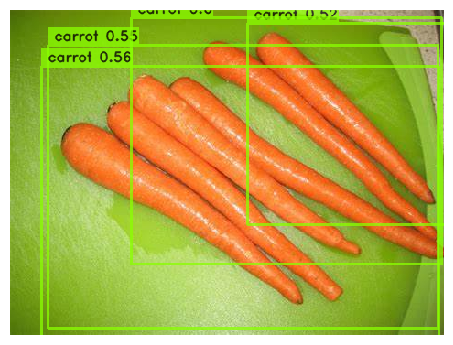

[2023-08-21 06:56:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


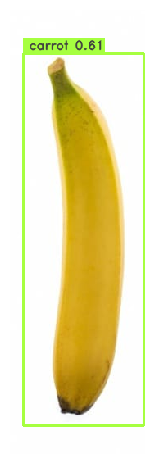

[2023-08-21 06:56:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


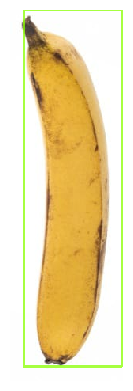

[2023-08-21 06:56:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


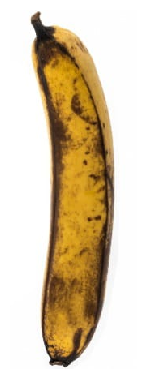

[2023-08-21 06:56:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


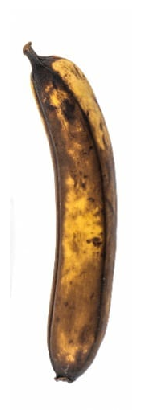

[2023-08-21 06:57:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


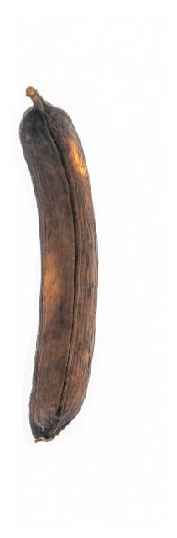

[2023-08-21 06:57:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


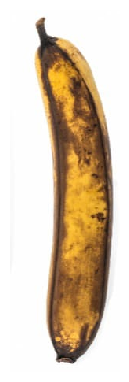

[2023-08-21 06:57:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


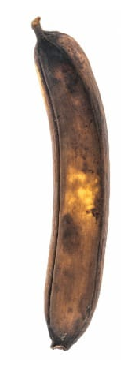

[2023-08-21 06:57:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


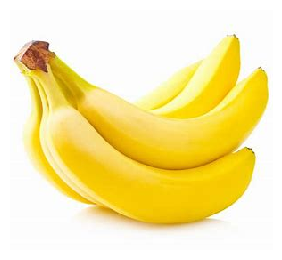

[2023-08-21 06:57:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


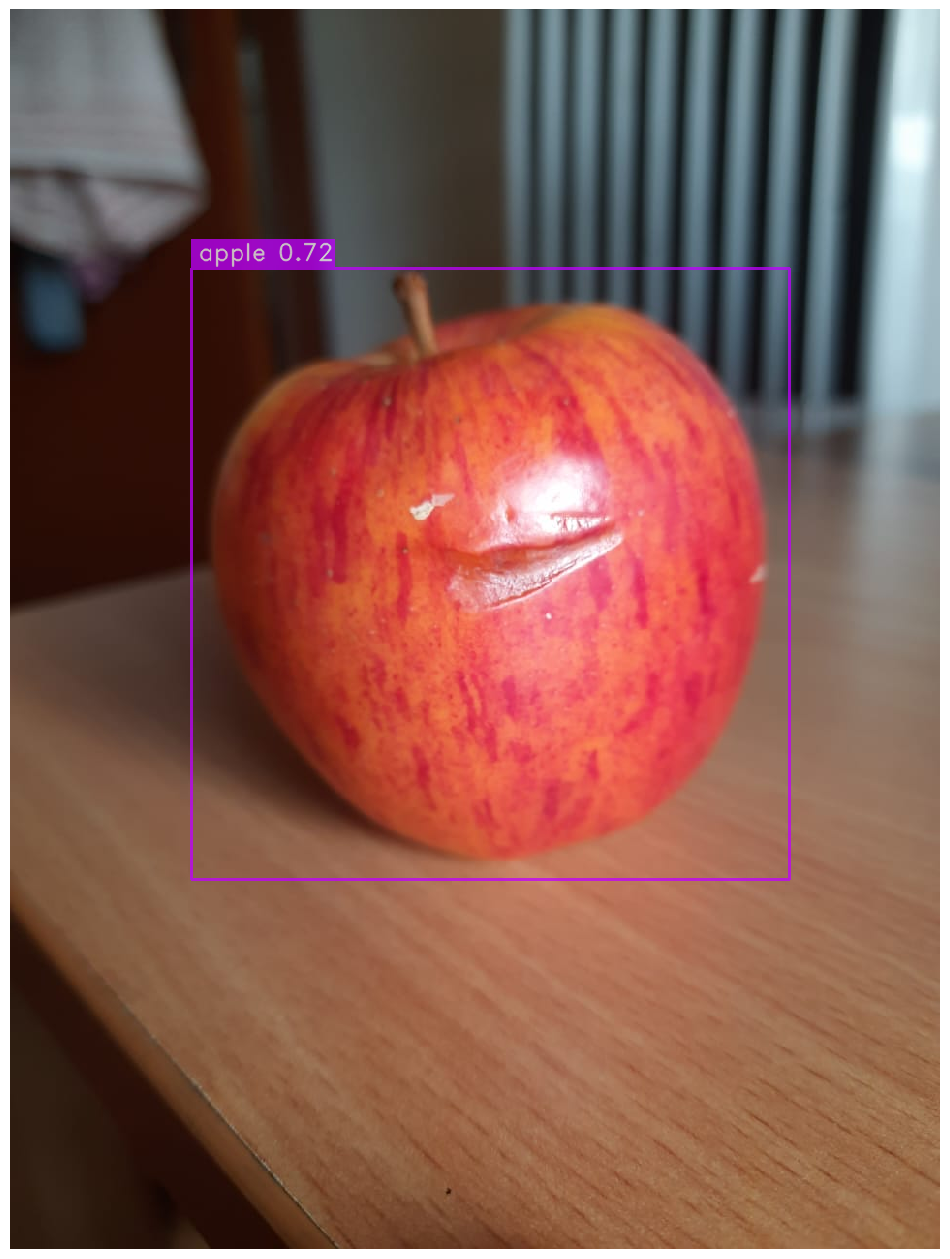

[2023-08-21 06:57:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


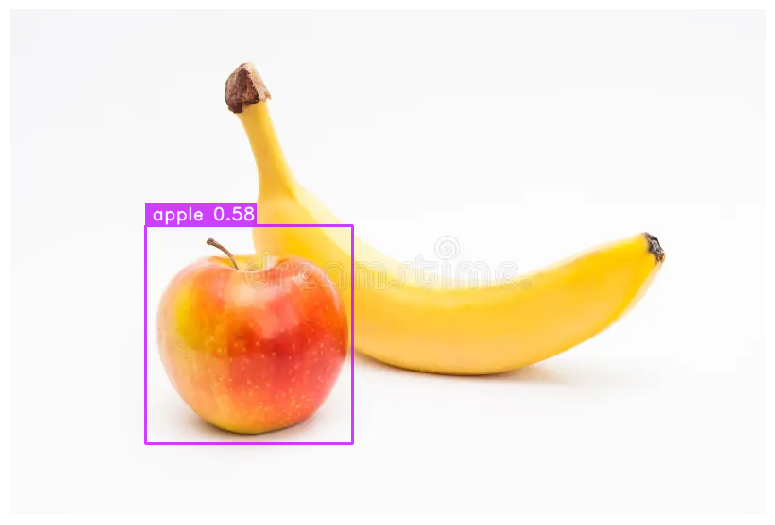

[2023-08-21 06:57:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


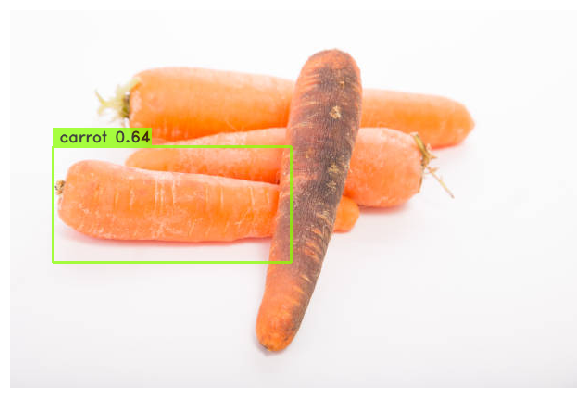

[2023-08-21 06:57:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


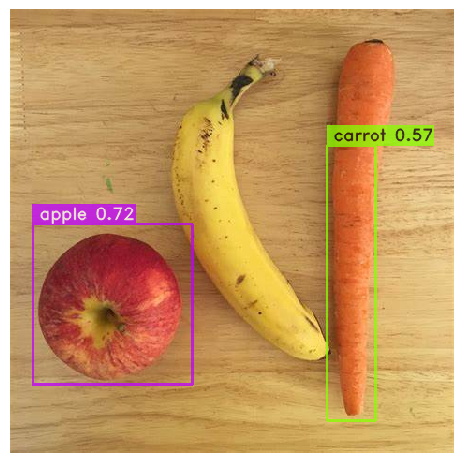

In [ ]:
import os
from PIL import Image

# Path to the folder containing test images
test_images_folder = '/content/drive/MyDrive/fruit_shelf_life_test/'

# Get a list of image filenames in the folder
image_files = os.listdir(test_images_folder)
image_files = [file for file in image_files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Load the model (assuming `best_model` is already loaded)

# Loop through each image and make predictions
for image_file in image_files:
    img_path = os.path.join(test_images_folder, image_file)
    prediction = best_model.predict(img_path)
    prediction.show()
